In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MaxNLocator
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv(r'C:\Users\ileni\OneDrive\Documents\Datasets\Salary.csv')

In [58]:
# Create a DataFrame with the first 5 rows of df and apply styling
coloured_df = df.head(5).style.set_properties(**{'background-color': '#ff5d5d ' ,'color':'black','border-color': '#96f9ff'})

# Set the table styles for the DataFrame.
coloured_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,YearsExperience,Salary
0,1,39343
1,1,46205
2,1,37731
3,2,43525
4,2,39891


In [54]:
# Convert the 'YearsExperience' column of the DataFrame to integer type
df['YearsExperience'] = df['YearsExperience'].astype(int)

In [24]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


In [60]:
# Calculate descriptive statistics for the DataFrame
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,5.914286,83945.600000
std,3.559341,32162.673003
min,1.000000,37731.000000
25%,3.000000,57019.000000
50%,5.000000,81363.000000
75%,9.000000,113223.500000
max,13.000000,139465.000000


In [28]:
# Get the column names of the DataFrame
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [104]:
# Check for missing values in the DataFrame
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

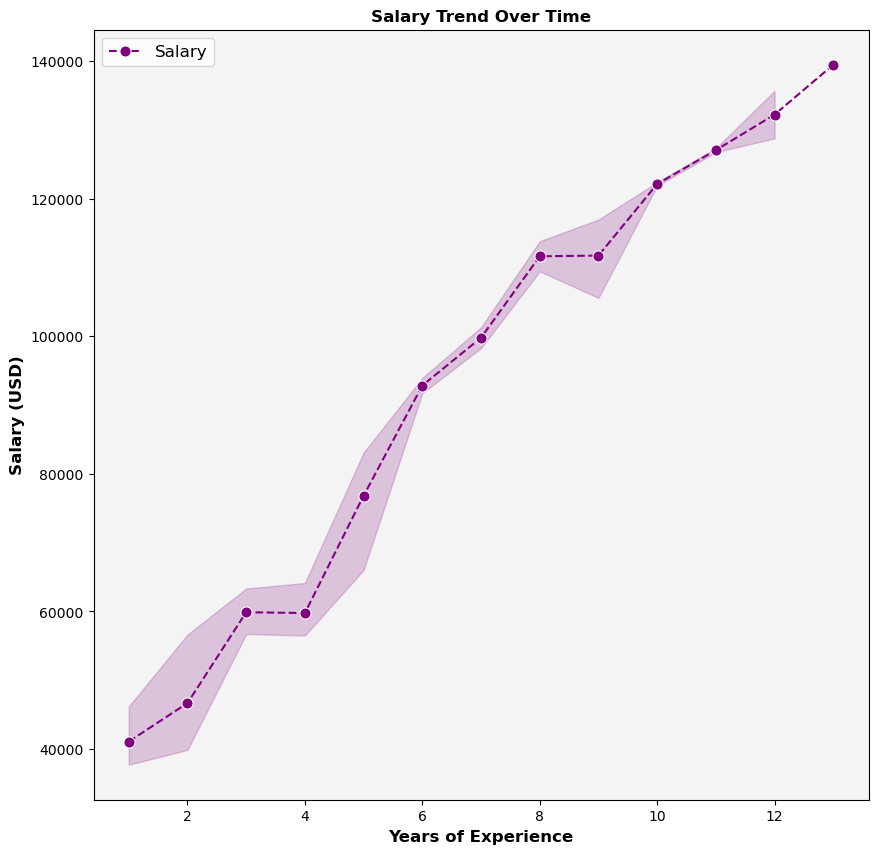

In [66]:
# Creates a line plot showing the salary trend over time
plt.figure(figsize=(10, 10))
salary_trending = df.sort_values(by='YearsExperience')
p = sns.lineplot(data=salary_trending, x='YearsExperience', y='Salary', marker='o', linestyle='--', color='purple', markersize=8)
plt.title('Salary Trend Over Time', fontsize=12, fontweight='bold') # Change Title
p.set_xlabel('Years of Experience', fontsize=12, fontweight='bold')  # Change x-axis label
p.set_ylabel('Salary (USD)', fontsize=12, fontweight='bold')  # Change y-axis labe

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

# Remove the grid lines
p.grid(False)

plt.show()

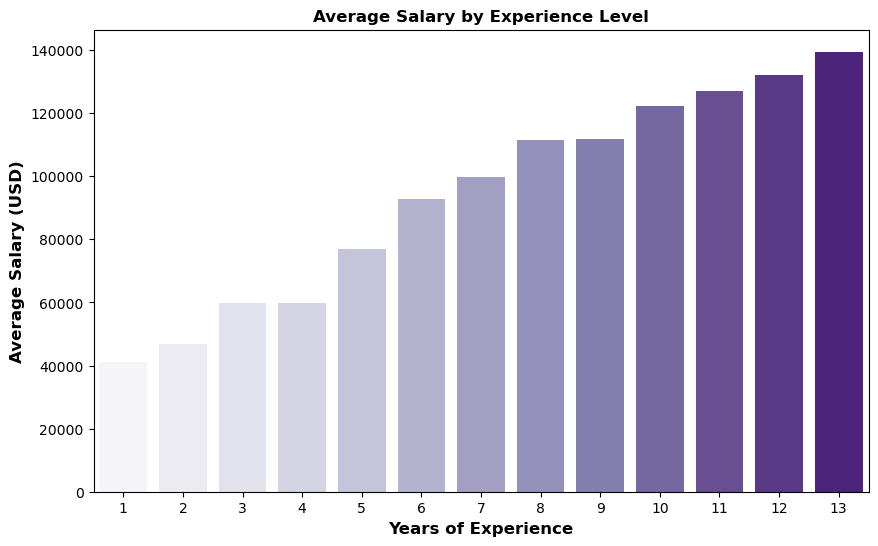

In [100]:
# Calculate the average salary by years of experience
xp_levelsby_salary = df.groupby('YearsExperience')['Salary'].mean()

# Create a figure with a specified size
plt.figure(figsize = (10,6))

# Create a bar plot using seaborn
barplot = sns.barplot(x = xp_levelsby_salary.index, y = xp_levelsby_salary.values, palette = 'Purples')

# Set the title, x-axis label, and y-axis label of the plot
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container,
                 padding=-50,
                 fontsize=17,
                 bbox={'boxstyle': 'round,pad=0.3', 'edgecolor': 'purple', 'facecolor': 'blue'},
                 label_type="edge",
                 fontweight='bold'
                 )

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

plt.show()

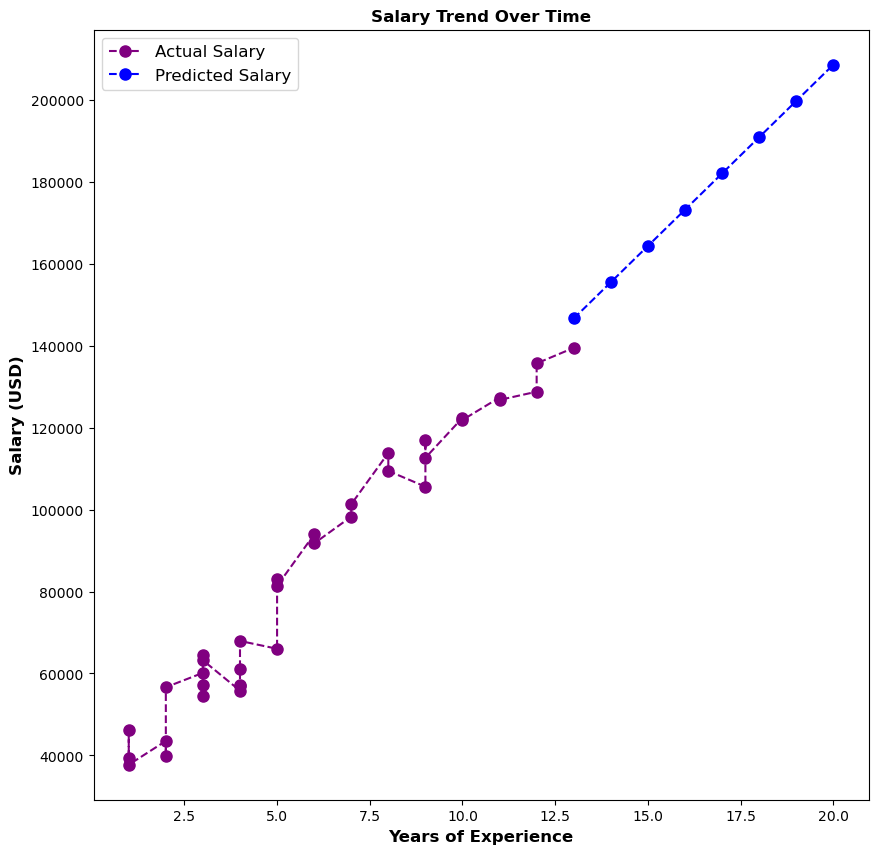

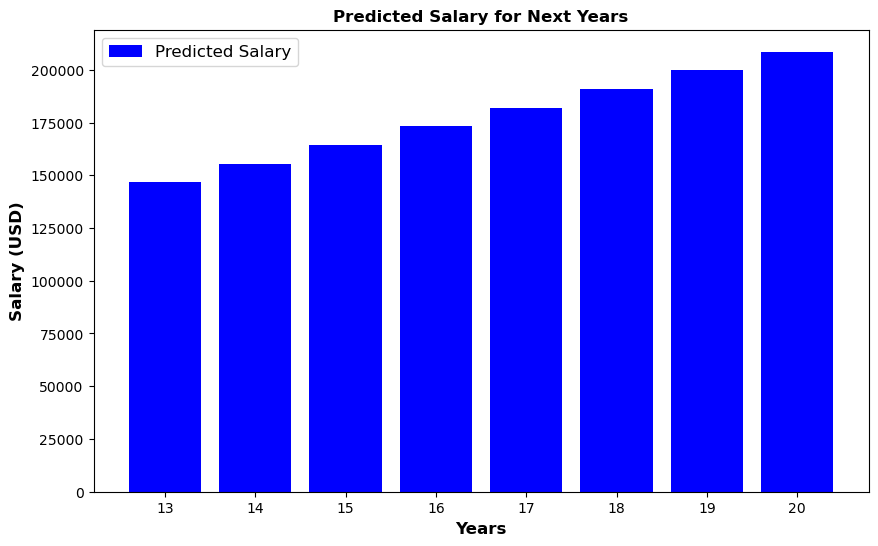

In [98]:
# Prepare the data
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the salary for the next years
next_years = np.arange(13, 21).reshape(-1, 1)
predicted_salary = model.predict(next_years)

# Plot the predicted salary as a line plot
plt.figure(figsize=(10, 10))
plt.plot(df['YearsExperience'], df['Salary'], marker='o', linestyle='--', color='purple', markersize=8, label='Actual Salary')
plt.plot(next_years, predicted_salary, marker='o', linestyle='--', color='blue', markersize=8, label='Predicted Salary')
plt.title('Salary Trend Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12, fontweight='bold')
plt.ylabel('Salary (USD)', fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(False)

# Format y-axis as integers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

# Plot the predicted salary as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(next_years.flatten(), predicted_salary, color='blue', label='Predicted Salary')
plt.title('Predicted Salary for Next Years', fontsize=12, fontweight='bold')
plt.xlabel('Years', fontsize=12, fontweight='bold')
plt.ylabel('Salary (USD)', fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(False)

# Format y-axis as integers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()